#### Explatory Data Aalysis 

#### - in this, we will explore how different variables likes gender, level of education, etc.affects student's perforemence  

#### - Data source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977


#### let me start by importing python libraries, that might be helpful for us.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### 1. import and explore the Dataset

#### 1.1 read stud.csv file


In [2]:
df = pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1.1.1 info of Dataset
- **gender** : sex of students -> (Male/female)  
- **race/ethnicity** : ethnicity of students -> (Group A, B, C, D, E)  
- **parental level of education** : parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)  
- **lunch** : having lunch before test (standard or free/reduced)  
- **test preparation course** : complete or not complete before test  
- **math score**  
- **reading score**  
- **writing score**


#### 1.2 rows and columns

In [3]:
df.shape

(1000, 8)

#### 1.3 checking Null values

In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### 1.4 checking duplicates

In [5]:
df.duplicated().sum()

0

#### 1.5 datatypes of columns 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 1.6 Statistics 

In [7]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


⚡ all stats are in between 65-70 ~ 'B' grade 

#### 1.7 unique values 

In [8]:
print("of object types :" )
print("\n")
print("gender:",df['gender'].unique())
print("race ethnicity:",df['race_ethnicity'].unique())
print("parental level of education:",df['parental_level_of_education'].unique())
print("lunch:",df['lunch'].unique())
print("test preparation course:",df['test_preparation_course'].unique())

print("\n")

print("of int types :" )
print("\n")
print("math score:",df['math_score'].nunique())
print("reading score:",df['reading_score'].nunique())
print("writing score:",df['writing_score'].nunique())

of object types :


gender: ['female' 'male']
race ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
test preparation course: ['none' 'completed']


of int types :


math score: 81
reading score: 72
writing score: 77


#### 2. Feature engineering 

#### 2.1 differentiate numerical and categorical features

In [9]:
numerical_fetures = [fetures for fetures in df.columns if df[fetures].dtypes != 'O']
categorical_fetures = [fetures for fetures in df.columns if df[fetures].dtypes == 'O']

#### 2.2 some additional features

In [10]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = (df['total_score'] / 3).round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


⚡ we will use total_score and average_score in all further anlysis.

#### 3. Visualization

3.1 genders with average


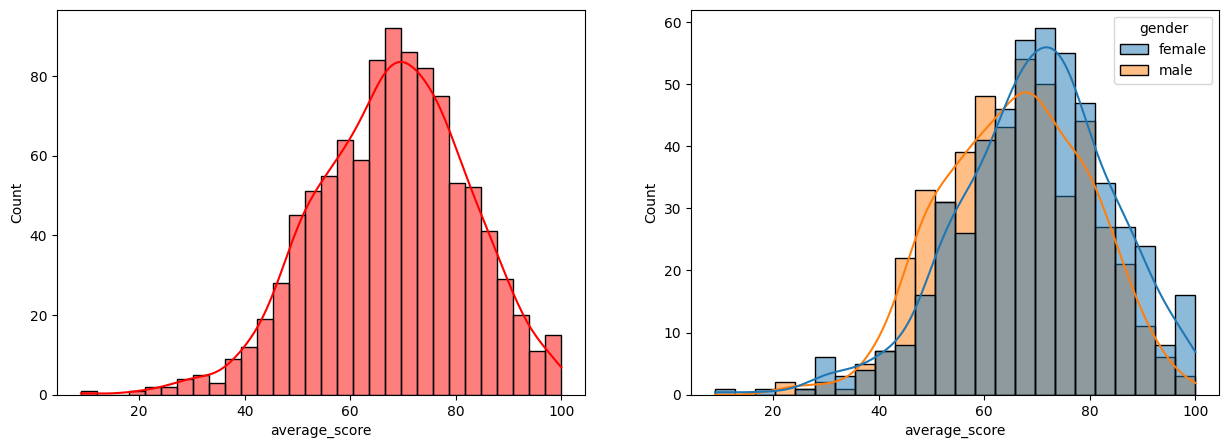

In [11]:
fig , axs = plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=df ,x='average_score',bins=30,color='r',kde=True)

plt.subplot(1,2,2)
sns.histplot(data=df , x='average_score' ,kde=True , hue='gender')

plt.show()

3.2 gender with total score

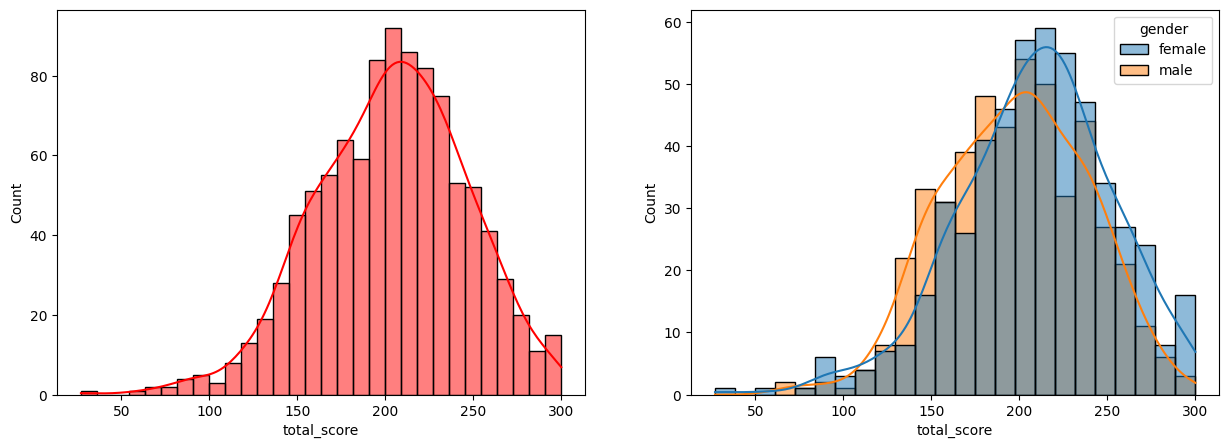

In [12]:
fig , axs = plt.subplots(1,2,figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(data=df ,x='total_score',bins=30,color='r',kde=True)

plt.subplot(1,2,2)
sns.histplot(data=df , x='total_score' ,kde=True , hue='gender')

plt.show()

⚡ females ended up high in both total score and average score.

3.2 lunch effects

<Axes: xlabel='average_score', ylabel='Count'>

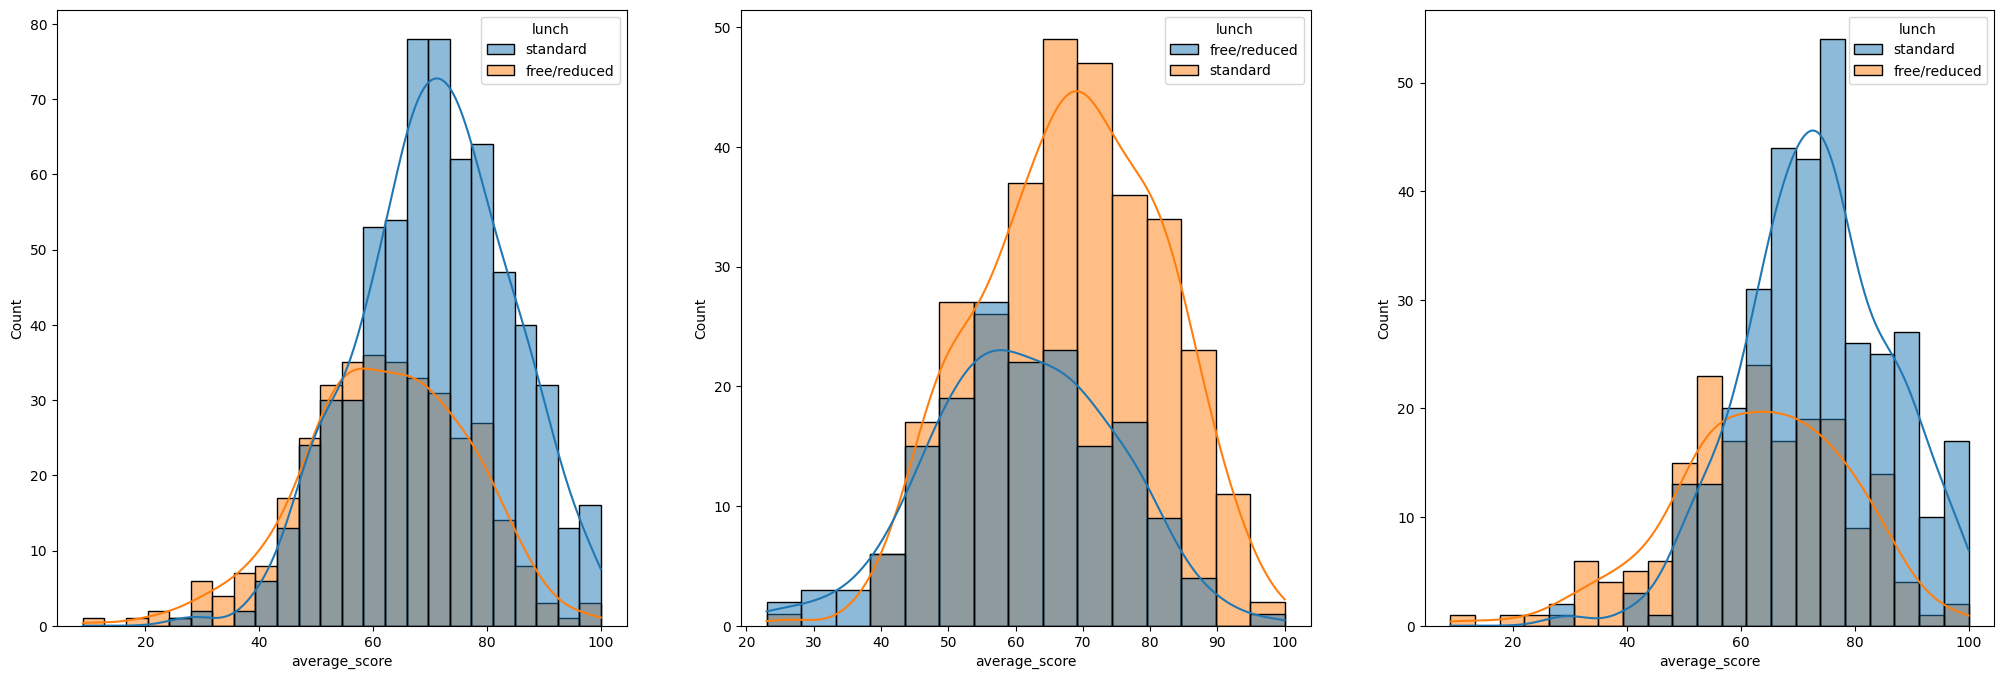

In [13]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
sns.histplot(data=df,x='average_score' , hue='lunch',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'] , x='average_score',kde=True , hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'] , x='average_score',kde=True , hue='lunch')


- ⚡ standard lunch helped students to score more. 
- ⚡ females takes more standard lunch then males. might be reason of high score.

3.3 parent education level effects

<Axes: xlabel='average_score', ylabel='Count'>

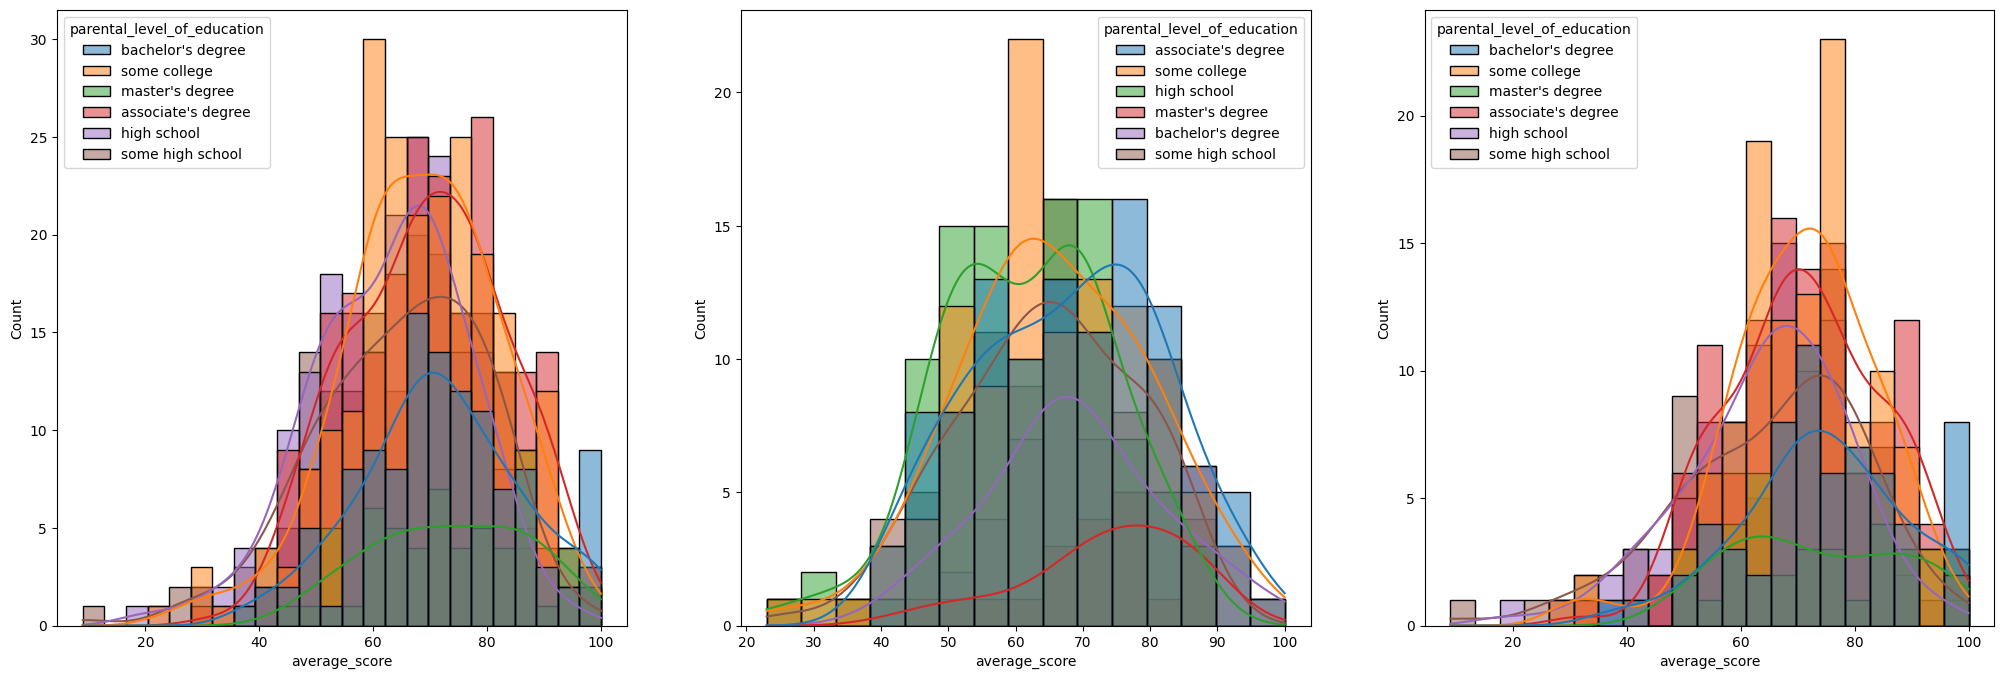

In [14]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
sns.histplot(data=df,x='average_score',hue='parental_level_of_education',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')


- ⚡ in females it don't showing any relation, becase we can see green line of master degree in bottom and also blue line of bachelor near bottom. 
- ⚡ masters reamining at bottom in all three indiates high level of parent's education relates with low score.
- ⚡ collage course and associate degree is at the top.    

3.4 by groups

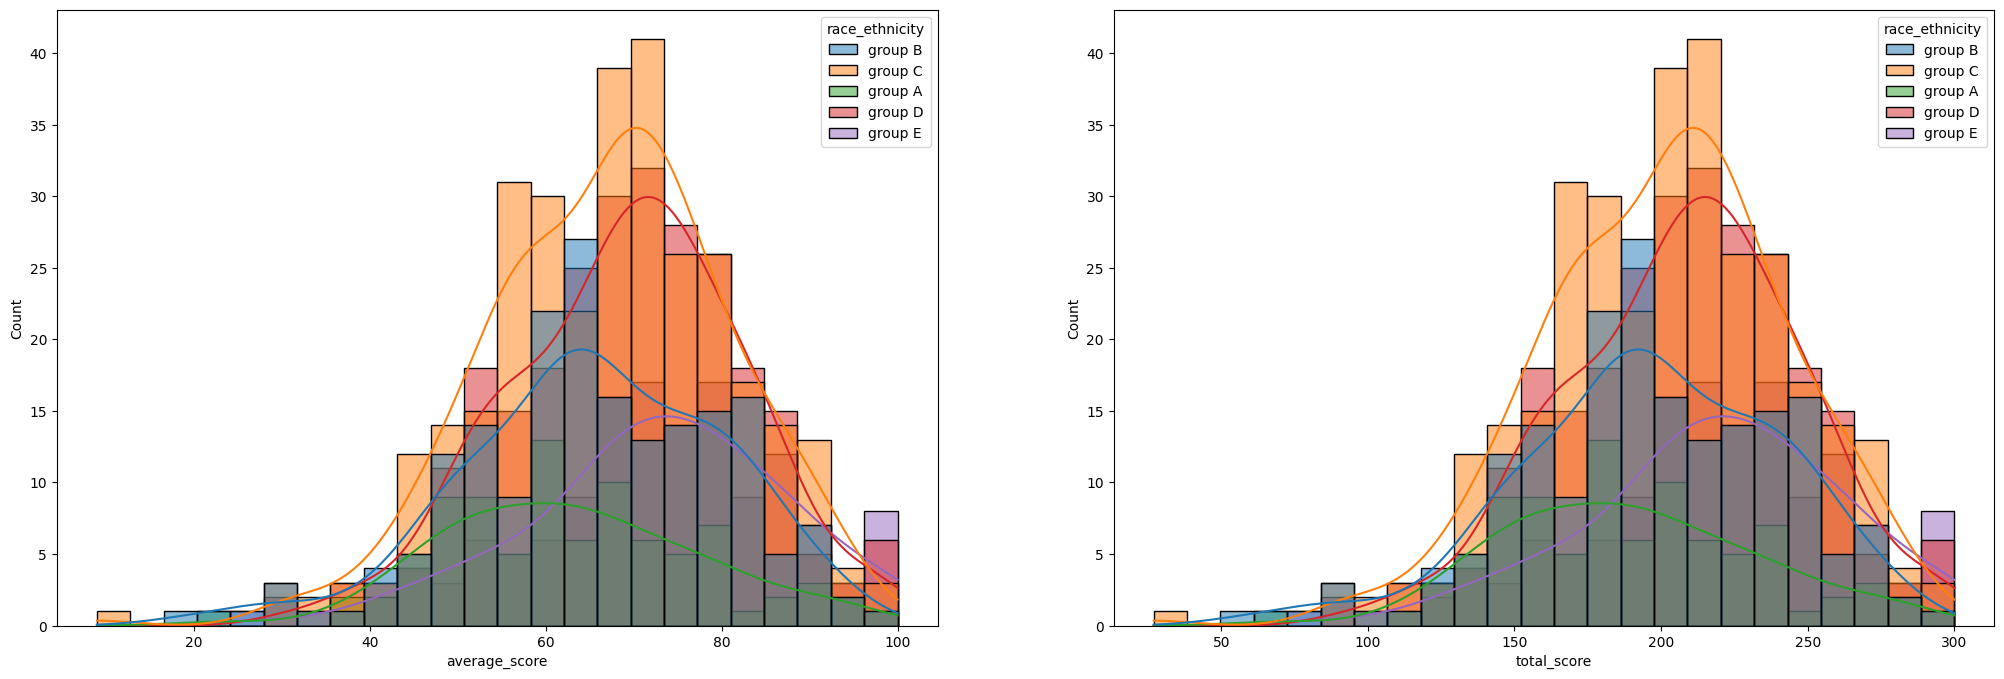

In [15]:
plt.subplots(1,2,figsize=(25,8))
plt.subplot(121)
sns.histplot(data=df , x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(122)
sns.histplot(data=df , x='total_score',kde=True,hue='race_ethnicity')
plt.show()

- ⚡group C and D 's students perforemence is impressive. while students of group A struggles to score. 

3.5 completion of test preparation course

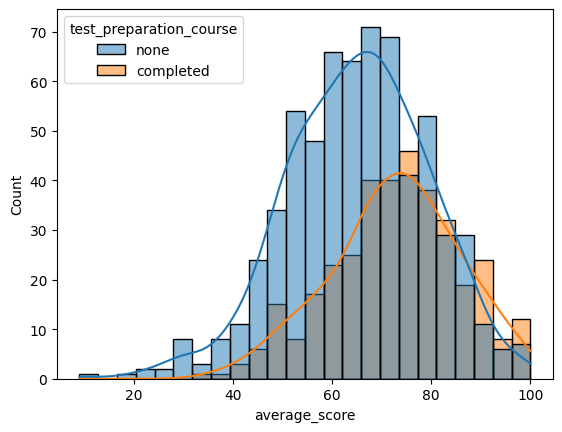

In [16]:
sns.histplot(data=df , x='average_score',kde=True,hue='test_preparation_course')
plt.show()

- ⚡ students with completion of preparation score are tilted to the right , which indicate course benifits students to score high 

3.6 time for stats

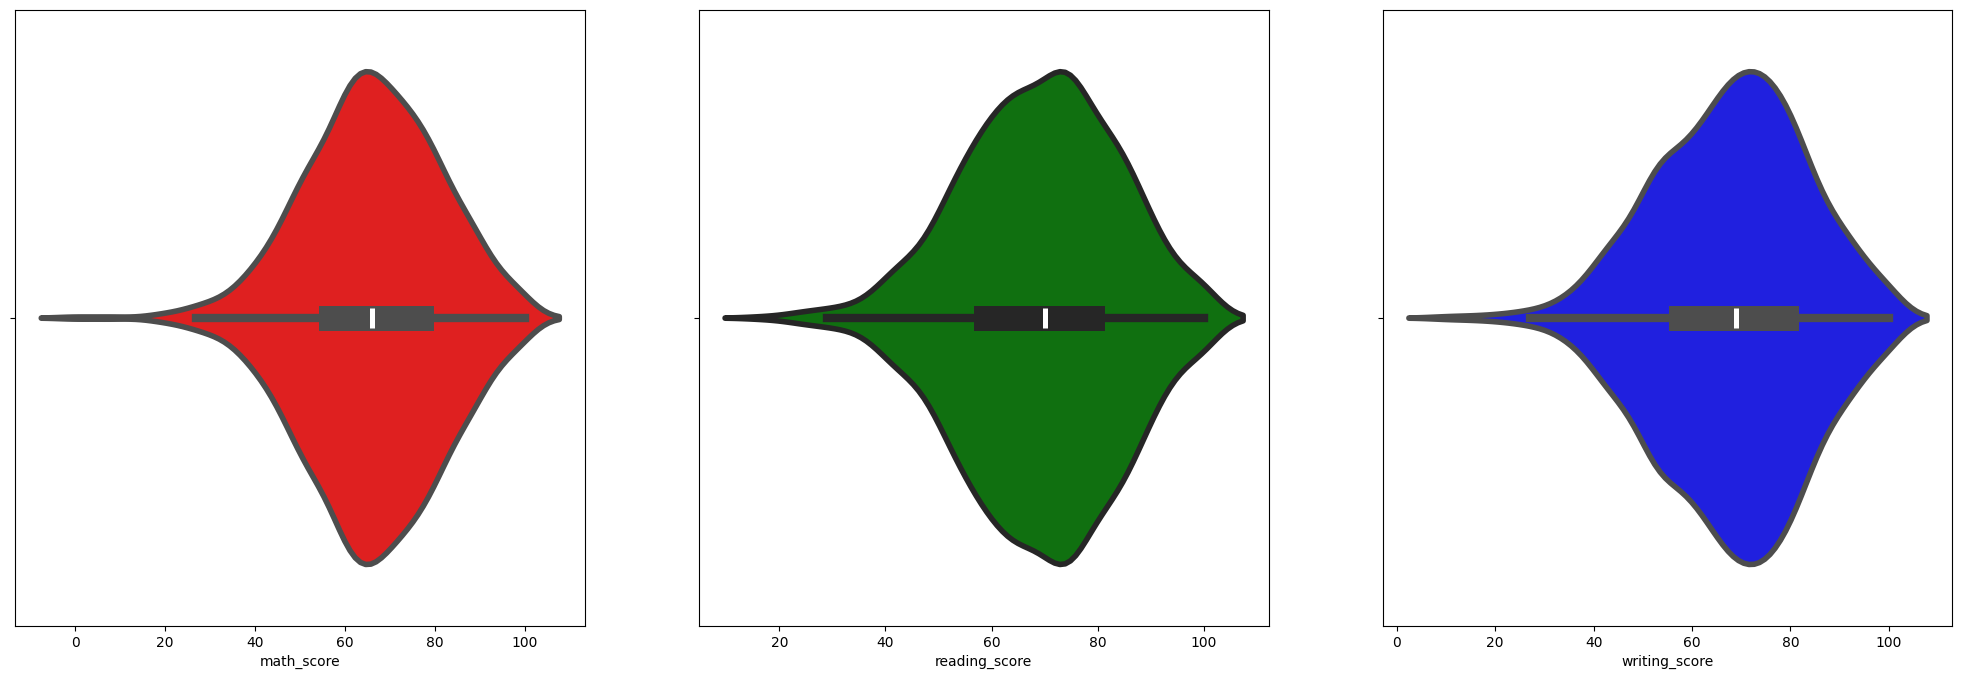

In [17]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(131)
sns.violinplot(data=df , x='math_score',color='r',linewidth=4)
plt.subplot(132)   
sns.violinplot(data=df , x='reading_score',color='g',linewidth=4)
plt.subplot(133)
sns.violinplot(data=df , x='writing_score',color='b',linewidth=4)
plt.show()

### 4.analysis

4.1 multi-variate analysis using pie plot 

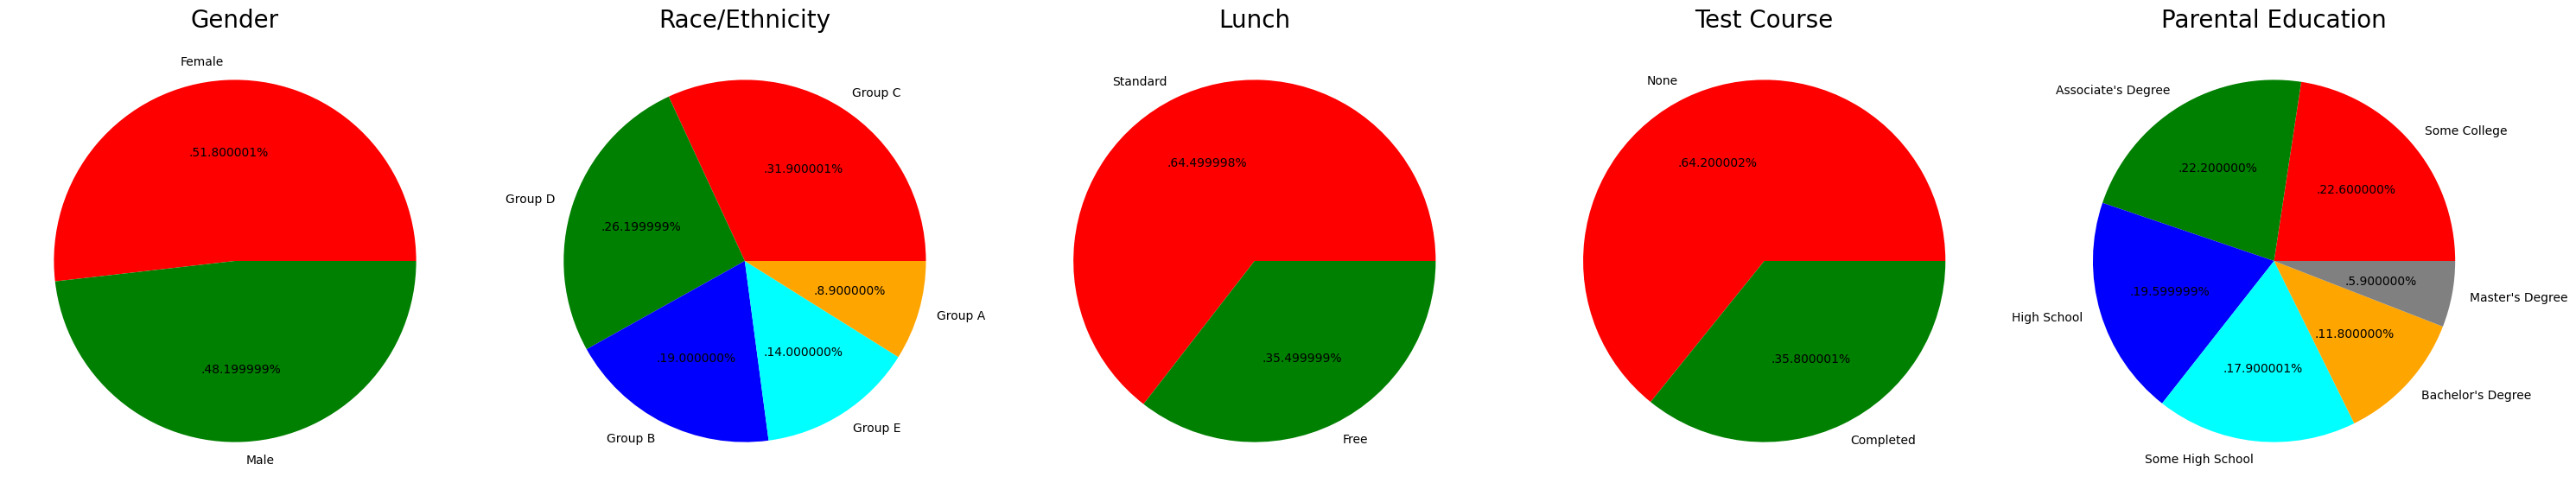

In [18]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']
plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)


plt.tight_layout()
plt.grid()

plt.show()